<a href="https://colab.research.google.com/github/vertuam/Experimentos-CCE-UEL/blob/master/ProjetoClassificacaoExercicio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# URL Dataset from reposirioty
urlDataset = 'https://github.com/vertuam/Experimentos-CCE-UEL/blob/master/zoo.csv?raw=true'
urlClasses = 'https://github.com/vertuam/Experimentos-CCE-UEL/blob/master/class.csv?raw=true'

# Load Dataset from reposirioty
dfDataset = pd.read_csv(urlDataset, index_col=0)
dfClasses = pd.read_csv(urlClasses, index_col=0)

print('Dataset carregados com sucesso!')

Dataset carregados com sucesso!


In [24]:
# Dataset ANIMAIS caregado
dfDataset.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [25]:
# Dataset de CLASSES carregado
dfClasses.head()

,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
Class_Number,,,
1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
5,4,Amphibian,"frog, frog, newt, toad"


In [26]:
# Verificar a qualidade dos dados e valores ausentes (NaN) (Animais)
dfDataset.isnull().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

In [27]:
# Dados do Dataset
dfDataset.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [28]:
# Array de classes and Print da classes encontradas no dataset
print(dfDataset.class_type.unique())
unique = dfDataset.class_type.unique()

[1 4 2 7 6 5 3]


1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64


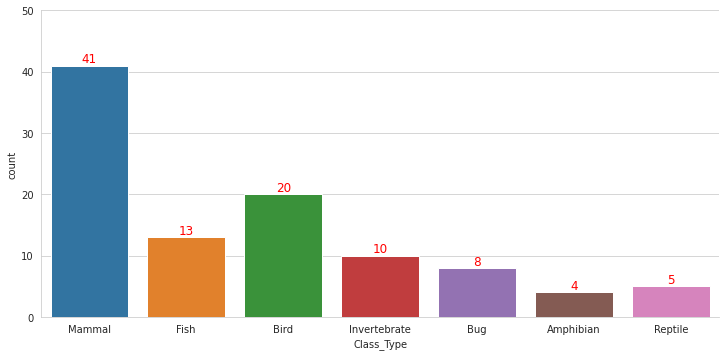

In [46]:
# Indentificando as quantidades de amostras por classes encontrada
import math

# Join tabela animal e classes
df=pd.merge(dfDataset, dfClasses, how='left', left_on='class_type', right_on='Class_Number')
df.head()

# Verificar os tipos e as quantidades de animais
sns.catplot('Class_Type', data=df, kind="count", aspect=2)

# Configurar o stilo da plotagem
sns.set_style('whitegrid')

def roundup(x):
    return 5 + int(math.ceil(x / 5.0)) * 5

ax = plt.gca()

y_max = df['Class_Type'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

print(dfDataset.class_type.value_counts())

# TODO - Usar ferramenta para captuar as cores e usar nas legendas e plots nos demais graficos

In [31]:
# PCA TESTES
from sklearn.decomposition import PCA
model = PCA()
model.fit(dfDataset[0:17])
transformed = model.transform(dfDataset[0:17])
print('Principle components: ', np.size(model.components_))

Principle components:  289


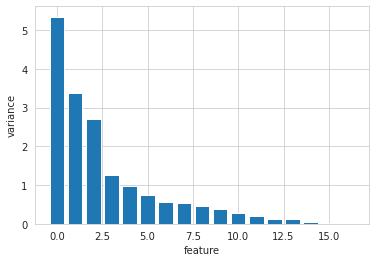

In [55]:
# PCA Variance TESTES
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(dfDataset)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('feature')
plt.ylabel('variance')
plt.show()

 :(  - Erro: Dados Ilegíveis! ->  frog    5
frog    5
Name: class_type, dtype: int64
 :(  - Erro: Dados Ilegíveis! ->  frog    5
frog    5
Name: class_type, dtype: int64


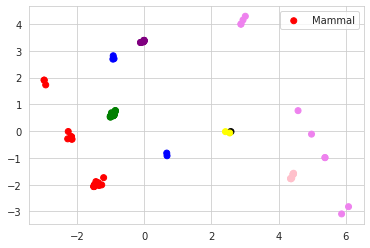

In [33]:
# a) Visualizar usando uma PCA as 7 classes de animais;

# PCA
pca = PCA(n_components = 2)
pca.fit(dfDataset)
transformed = pca.transform(dfDataset)
x = transformed[:,0]
y = transformed[:,1]
legend = []
color = []
for i in dfDataset.index:
  #Refatorar para usar while para deixar dinamico quanto ao numero de classes
  try:
    if dfDataset['class_type'][i]==1:
      legend = np.append(legend, ['Mammal'])
      color  = np.append(color, ['red'])
    elif dfDataset['class_type'][i]==2:
      legend = np.append(legend, 'Bird')
      color  = np.append(color, ['green'])
    elif dfDataset['class_type'][i]==3:
      legend = np.append(legend, 'Reptile')
      color  = np.append(color, ['blue'])
    elif dfDataset['class_type'][i]==4:
      legend = np.append(legend, 'Fish')
      color  = np.append(color, ['purple'])
    elif dfDataset['class_type'][i]==5:
      legend = np.append(legend, 'Amphibian')
      color  = np.append(color, ['yellow'])
    elif dfDataset['class_type'][i]==6:
      legend = np.append(legend, 'Bug')
      color  = np.append(color, ['pink'])
    elif dfDataset['class_type'][i]==7:
      legend = np.append(legend, 'Invertebrate')
      color  = np.append(color, ['violet'])

  except:
    color  = np.append(color, ['black'])
    print(' :(  - Erro: Dados Ilegíveis! -> ', dfDataset['class_type'][i])

plt.scatter(x, y, c=color)

#Verificar pq a legenda so printa a primeira
plt.legend(legend)
plt.show()

In [57]:
# b) Implemente um código para dividir o conjunto de animais entre treino e teste;
from sklearn.model_selection import train_test_split

data = dfDataset.copy()

x = data.drop("class_type", axis = 1)
y = data.class_type.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print("x_train -> shape : ", x_train.shape)
print("x_test -> shape : ", x_test.shape)
print("y_train -> shape : ", y_train.shape)
print("y_test -> shape : ", y_test.shape)

x_train -> shape :  (80, 16)
x_test -> shape :  (21, 16)
y_train -> shape :  (80,)
y_test -> shape :  (21,)


Best K value =  2
Best score =  1.0


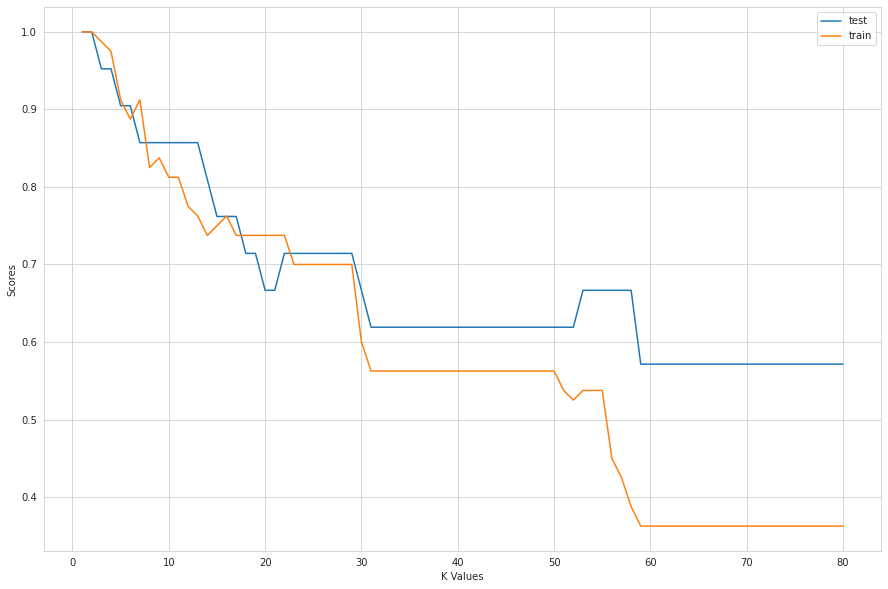

classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



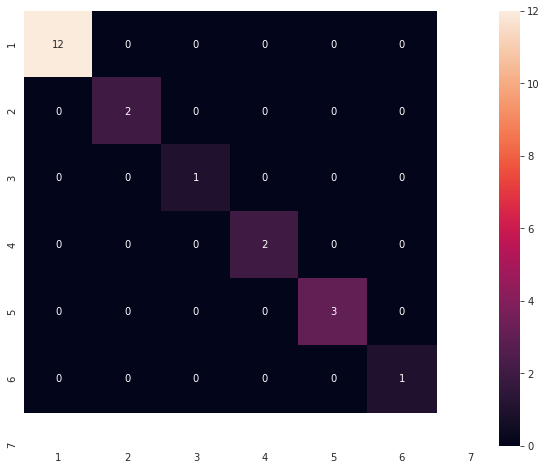

In [62]:
# c) Implemente um k-NN e demonstre graficamente o melhor valor de "k" encontrado;
from sklearn.neighbors import KNeighborsClassifier

scr_max = 0
knn_test_score_list = []
knn_train_score_list = []

for i in range(1, x_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    knn_test_scr = knn.score(x_test, y_test)
    knn_test_score_list.append(knn_test_scr)
    knn_train_scr = knn.score(x_train, y_train)
    knn_train_score_list.append(knn_train_scr)
    if knn_test_scr >= scr_max:
        scr_max = knn_test_scr
        index = i

print("Best K value = ",index)
print("Best score = ",scr_max)

plt.figure(figsize = (15,10))
plt.plot(range(1,x_train.shape[0]+1),knn_test_score_list,label = "test")
plt.plot(range(1,x_train.shape[0]+1),knn_train_score_list,label = "train")
plt.legend()
plt.xlabel("K Values")
plt.ylabel("Scores")
plt.show()

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
cr_knn = classification_report(y_test,y_pred_knn)
cm_knn = confusion_matrix(y_test,y_pred_knn)

print("classification report : \n",cr_knn)

plt.figure(figsize = (10,8))
sns.heatmap(cm_knn,annot = True,xticklabels = np.arange(1, 8),yticklabels = np.arange(1, 8))
plt.show()

Train Accurary :  1.0
Test Accuray :  0.9523809523809523
classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


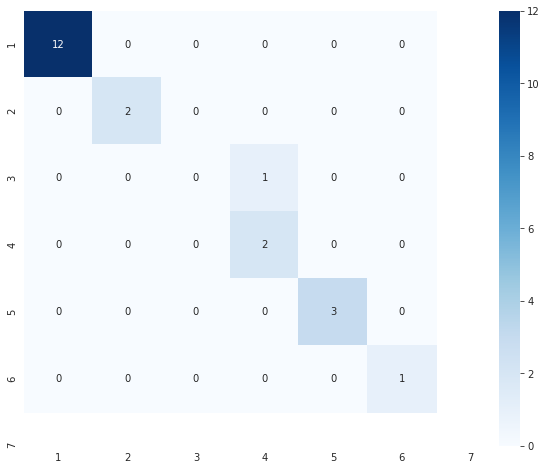

In [61]:
# d) Implemente uma SVM e demonstre graficamente a melhor configuração de SVM (variando no mínimo kernel e cost);

# SVM
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report

svm = SVC(random_state = 42, kernel = "linear")
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
print("Train Accurary : ",svm.score(x_train,y_train))
print("Test Accuray : ",svm.score(x_test,y_test))

cm_svm = confusion_matrix(y_test,y_pred_svm)
cr_svm = classification_report(y_test,y_pred_svm)

print("classification report : \n",cr_svm)

plt.figure(figsize = (10,8))
sns.heatmap(cm_svm,annot = True,cmap = "Blues",xticklabels = np.arange(1,8),yticklabels = np.arange(1,8))
plt.show()

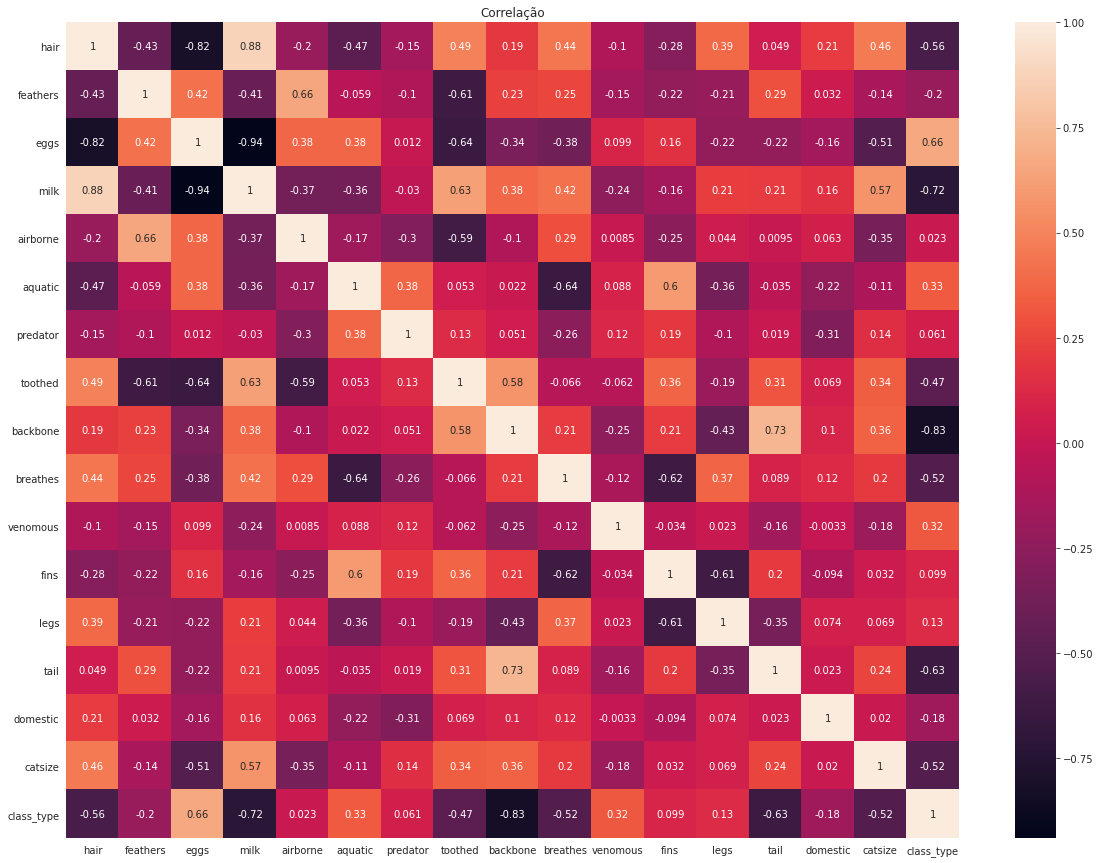

In [60]:
# Mapa de calor para apresentar as correlações entre atributos TESTE
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlação")
corr = dfDataset.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

As amostras incorretamente classificadas são da classe 3 e da classe 7. Acredito que por conta da baixa quantidade de amostras tenhamos essa errônea classificação das mesmas.

Nos dois métodos de classificação utilizados a classe tipo 3 teve falsos positivos. Utilizando KNN a classe tipo 7 também apresentou um falo positivo.
